# ABC Analysis with Machine Learning

### ABC analysis assumes that income-generating items in an inventory follow a Pareto distribution, where a very small percentage of items generate the most income. In this article, I’ll walk you through how we can perform ABC analysis with Machine Learning.

## Conventions of ABC Analysis
### Using the conventions of ABC analysis, an inventory item is assigned a letter based on its importance:

### A articles represent 20% of articles, but contribute 70% of revenue
### B-articles represent 30% of articles, but contribute 25% of revenue
### C articles represent 50% of articles, but contribute 5% of revenue
### Keep in mind that these numbers are approximate and will vary widely depending on the actual distribution of sales. The main takeaway is that A items make up a small percentage of inventory but contribute the most to income, C items make up a large percentage of inventory but contribute the least to income and B items are somewhere around leaves in the middle.

##Importance of ABC Analysis
###Inventory planning and warehousing strategies of an organization rely on ABC analysis to make any key decisions. For example, a warehouse manager typically wants A items closest to the shipping docks to reduce the time it takes to pick them up. This increases productivity and reduces labour costs.

### The goal of this project is to sort all the elements of the dataset into an ABC categorization based on their importance. When viewing the results, there should be relatively few A items that generate the majority of income and a large number of C items that do not generate much income.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from google.colab import files
uploaded = files.upload()

Saving summer-products.csv to summer-products.csv


In [17]:
df = pd.read_csv("summer-products.csv")
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


### I will add a new column to the data for revenue by simply multiplying the number of units sold by the price. It is possible that the price has changed over time, especially when flash sales have taken place, but without additional data to analyze, it is assumed that all items sold at a single, stable price:

In [18]:
df["revenue"] = df["units_sold"] * df["price"]

### Now, lets visualize the revenue by using the seaborn package in python:

<ipython-input-19-fd7d9a679875>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["revenue"])


<Axes: xlabel='revenue', ylabel='Density'>

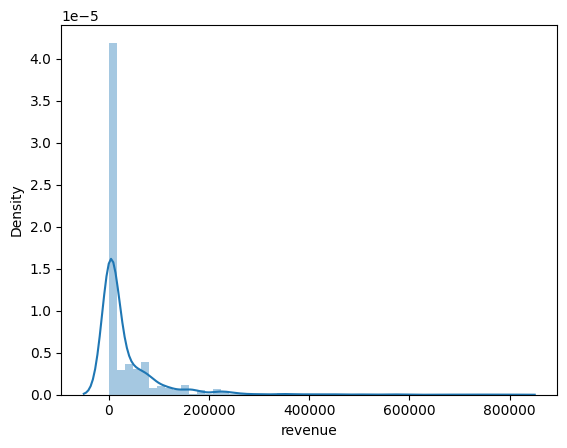

In [19]:
import seaborn as sns
sns.distplot(df["revenue"])

### The graph above shows the Pareto distribution found in the data. The vast majority of articles generate less than € 200,000 in sales. At the same time, it shows that some of the items sell for between € 400,000 and € 800,000, which is contributing in the majority of the revenue.

### Now, I’m going to define a function to categorize the amount of income generated by an item into bins, and then I’ll apply it to the data:

In [21]:
def bins(x):
    for bar in range(20000, 820000, 20000):
        if x <= bar:
            return bar

# Criar uma nova coluna e aplicar a função bins
df["rev_dist"] = df["revenue"].apply(lambda x: bins(x))


### Now I’m going to create a pivot table to list the number of items that fall into each category:

In [22]:
df["count"] = 1
# Create a pivot table of the revenue distributions
pivot_table = pd.pivot_table(df, index = ["rev_dist"], values = ["count"], aggfunc = np.sum)

<ipython-input-22-41d5eb0d069c>:3: FutureWarning: The provided callable <function sum at 0x79a334302e60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(df, index = ["rev_dist"], values = ["count"], aggfunc = np.sum)


## Applying Machine Learning Algorithm
### To properly train the model, it is not enough to just look at the income generated by each item. He must also know how income is distributed. This pivot table provides a very manageable data set that the model can train on. I will use the K-Means Clustering algorithm for this task of ABC Analysis:

In [23]:
# import model from SKLearn
from sklearn.cluster import KMeans
# K -clusters is equal to 3 because things will be sorted into A, B, and C
kmeans = KMeans(n_clusters=3)
kmeans.fit(pivot_table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

### I will now add a new column to the pivot table giving the classification of the model. It should be noted that by default, scikit-learn’s K-means algorithm will rank items on a numeric scale instead of the alphabetical scale used in the ABC analysis. Therefore, each row will be labelled as zero, one, or two:

In [24]:
pivot_table["category"] = kmeans.labels_

### Now, I will define a new dictionary to classify each row for the task of ABC analysis:

In [25]:
ABC_dict = {
    0: "A",
    1: "C",
    2: "B"
}
pivot_table["ABC"] = pivot_table["category"].apply(lambda x: ABC_dict[x])

### Now, remember that the model was trained on a pivot table. The elements have not yet been assigned an ABC classification. Instead, it was assigned an income classification:

In [26]:
f = pd.merge(df, pivot_table, on = "rev_dist", how ="left")

### This means that while we don’t immediately know which items fall into Category A, we do know that some income classifications are classified as A Items. As a result, we can just merge the main data frame and the PivotTable to give each item its ABC classification.

### When analyzing the final distribution of the elements, it was found that:

### A-items represent 11.4% of articles, but 61.7% of turnover
### B-items represent 20.5% of items, but 30.7% of turnover
### C articles represent 68.1% of articles, but 7.6% of turnover